# Imports

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# To import from this project
import sys
sys.path.insert(0, '..')

In [2]:
from models.biscuit import BISCUIT, DPGMM

## Sample generation
Generate samples from a BISCUIT with random parameters.

In [3]:
# Settings
N = 100
d = 3
K = 3

# Feed
var = 1
X = multivariate_normal.rvs(mean=np.zeros((d,)), cov=var*np.eye(d), size = N)

# Create a random Biscuit and sample from it
biscuit = BISCUIT()
biscuit.set_random_parameters(X, K)
X = biscuit.sample(N, sort=True)

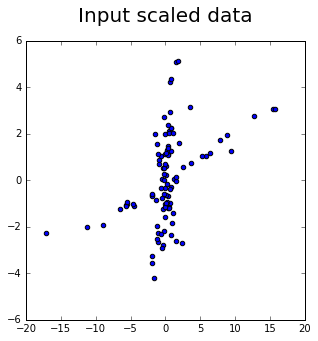

pi: [[ 0.31873198]
 [ 0.27043313]
 [ 0.41083489]]

mu: [[ 3.64551538  0.76185904  1.06276107]
 [-0.31770735  0.51469193  2.68307764]
 [ 0.40155085  1.15712519 -0.41586201]]

cov: [[[ 0.05486122  0.0035133   0.05713629]
  [ 0.0035133   0.01579282  0.04208575]
  [ 0.05713629  0.04208575  0.18517774]]

 [[ 0.04306645 -0.01438325  0.01347335]
  [-0.01438325  0.0245863   0.03619703]
  [ 0.01347335  0.03619703  0.10286529]]

 [[ 0.10119714 -0.00765888  0.0509704 ]
  [-0.00765888  0.02526871  0.04660484]
  [ 0.0509704   0.04660484  0.15935598]]]

assigment counts 0: 29
assigment counts 1: 21
assigment counts 2: 50


In [4]:
# Plot samples
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Input scaled data', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()

print("pi: " + str(biscuit.pi))
print("")
print("mu: " + str(biscuit.mu))
print("")
print("cov: " + str(biscuit.cov))
print("")
for i in range(biscuit.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(biscuit.z == i)))

In [5]:
cm_true = np.zeros((N, N))
cm_true = biscuit.update_confusion_matrix(cm_true)

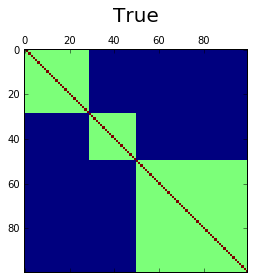

In [6]:
plt.matshow(cm_true)
plt.title('True', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

## Clustering
Fit a model to the generated data and evaluate the obtained clustering with a confusion matrix.

### HDPMM

In [7]:
dpgmm = DPGMM()
cm_hdgmm = dpgmm.fit(X, n_iterations=300, n_burnin=200, return_cm=True)

../models/dpgmm.py:124: RuntimeWarning: invalid value encountered in divide
  probs = probs / np.sum(probs)
 64%|██████▍   | 192/300 [00:41<00:23,  4.60it/s]../models/dpgmm.py:154: RuntimeWarning: invalid value encountered in divide
  probs = probs / np.sum(probs)
../models/dpgmm.py:156: RuntimeWarning: invalid value encountered in less
  self.z[n] = np.random.choice(range(self.K_active + self.n_aux), p=probs)
100%|██████████| 300/300 [00:59<00:00,  5.06it/s]


In [8]:
print("Estimated %d clusters." % dpgmm.K_active)
for i in range(dpgmm.K_active):
    print("Assigment counts of cluster " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

Estimated 2 clusters.
Assigment counts of cluster 0: 48
Assigment counts of cluster 1: 52


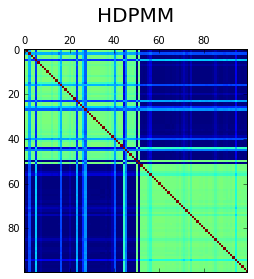

In [9]:
plt.matshow(cm_hdgmm)
plt.title('HDPMM', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

### BISCUIT

In [10]:
biscuit = BISCUIT()
cm_biscuit = biscuit.fit(X, n_iterations=300, n_burnin=200, return_cm=True)

  0%|          | 1/300 [00:00<00:55,  5.38it/s]../models/biscuit.py:89: RuntimeWarning: invalid value encountered in divide
  probs = probs / np.sum(probs)
../models/biscuit.py:91: RuntimeWarning: invalid value encountered in less
  self.z[n] = np.random.choice(range(self.K_active + self.n_aux), p=probs)
100%|██████████| 300/300 [01:24<00:00,  3.57it/s]


In [11]:
print("Estimated %d clusters." % biscuit.K_active)
for i in range(biscuit.K_active):
    print("Assigment counts of cluster " + str(i) + ": " + str(np.count_nonzero(biscuit.z == i)))

Estimated 4 clusters.
Assigment counts of cluster 0: 27
Assigment counts of cluster 1: 33
Assigment counts of cluster 2: 39
Assigment counts of cluster 3: 0


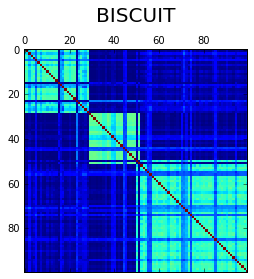

In [12]:
plt.matshow(cm_biscuit)
plt.title('BISCUIT', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()